Name: Jomarie Dupaya <br>

Course and Section: CPE32S3 <br>  

Date of Submission: 2/7/2024 <br>

Instructor: Engr. Roman Richard <br>


Objectives <br>

* Part 1: The Dataset<br>
* Part 2: Scatterplot Graphs and Correlatable Variables<br>
* Part 3: Calculating Correlation with Python<br>
* Part 4: Visualizing </b>

Scenario/Background<br>

Correlation is an important statistical relationship that can indicate whether the variable values arelinearly related.<br>

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset.In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part3, you will use Python to calculate the correlation between two sets of variable.

1. Replace the quesion marks used to represent the withheld data points described above by the'NaN' string. The substitution was done because Pandas does not handle the question markscorrectly.
2. Replace all tab characters with commas, converting the dataset into a CSV dataset.<br>

The prepared dataset is saved as
brainsize.txt.<br><br>

##**Part 1: The Dataset**##

Step 1: Loading the Dataset From a File.<br><br>

Before the dataset can be used, it must be loaded onto memory.<br>

In the code below, The first line imports the
pandas modules and defines pd as a descriptor that refers to the module.

The second line loads the dataset CSV file into a variable called
brainFile.

The third line uses
read_csv(), a pandas method, to convert the CSV dataset stored in
brainFile
into adataframe. The dataframe is then stored in the
brainFrame
variable.

Run the cell below to execute the described functions.

In [ ]:
import pandas as pd
brainFile = './Data/brainsize.txt'
brainFrame = pd.read_csv(brainFile, delim_whitespace= True)

Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the
head()

method. AnotherPandas method,
head()

displays the first five entries of a dataframe.


In [ ]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


##**Part 2: Scatterplot Graphs and Correlatable Variables**##

Step 1: The pandas
describe()
method.

The pandas module includes the
describe()
method which performs same common calculationsagainst a given dataset. In addition to provide common results including count, mean, standarddeviation, minimum, and maximum,
describe()
is also a great way to quickly test the validity of thevalues in the dataframe.

Run the cell below to output the results computed by
describe()
against the
brainFrame
dataframe.


In [ ]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visualverification of the nature of the relationship between the variables. This lab uses the Pearson correlationcoefficient, which is sensitive only to a linear relationship between two variables. Other more robustcorrelation methods exist but are out of the scope of this lab.

*a. Load the required modules.*

Before graphs can be plotted, it is necessary to import a few modules, namely
numpy
and
matplotlib
.Run the cell below to load these modules.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.

To ensure the results do not get skewed because of the differences in male and female bodies, thedateframe is split into two dataframes: one containing all male entries and another with only femaleinstances.

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing therespective entries.

In [ ]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs.

Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first linebelow uses Pandas
mean()
method to calculate the mean value between the three and store the result inthe
menMeanSmarts
variable. Notice that the first line also refers to the menDf, the filtered dataframecontaining only male entries.

The second line uses the
matplotlib
method
scatter()
to create a scatterplot graph between the
menMeanSmarts
variable and the
MRI_Count
attribute. The MRI_Count in this dataset can be thought as ofa measure of the physical size of the subjects' brains.

The third line simply displays the graph.

The fourth line is used to ensure the graph will be displayed in this notebook.

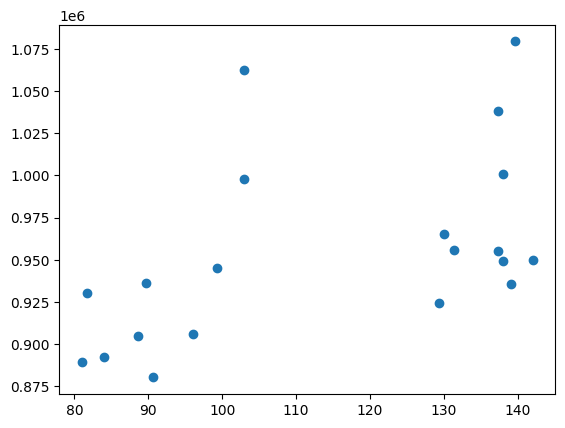

In [ ]:
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

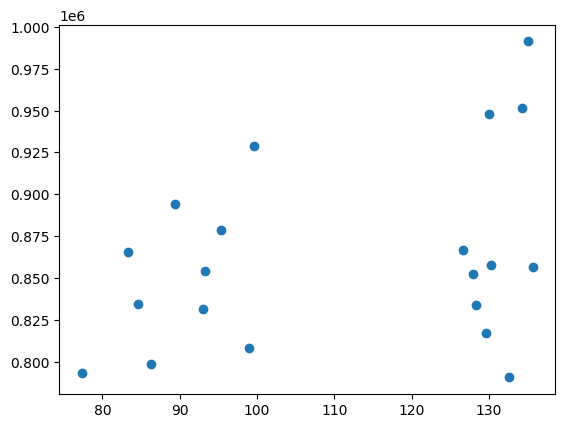

In [ ]:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

##**Part 3: Calculating Correlation with Python**##

Step 1: Calculate correlation against brainFrame.

The pandas
corr()
method provides an easy way to calculate correlation against a dataframe. By simplycalling the method against a dataframe, one can get the correlation between all variables at the sametime.

In [ ]:
brainFrame.corr(method='pearson')

<ipython-input-52-4d3089cc6357>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filledwith 1s? Is that a coincidence? Explain.

**Answer:** It is because the varibles in the dataframe correlates perfectly with each other. It is also the reason why the values are exactly 1.<br><br>

Still looking at the correlation table above, notice that the values are mirrored; values below the 1diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

**Answer:** It is also because the correlation matrices are symmetrical meaning the values on the top should have the same values below.<br><br>

Using the same
corr()
method, it is easy to calculate the correlation of the variables contained in thefemale-only dataframe:

In [ ]:
womenDf.corr(method='pearson')

<ipython-input-53-01fad84dd5db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
menDf.corr(method='pearson')

<ipython-input-54-4396b7a1db7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


##**Part 4: Visualizing**##

Step 1: Install Seaborn.

To make it easier to visualize the data correlations, heatmap graphs can be used. Based on coloredsquares, heatmap graphs can help identify correlations in a glance.

The Python module named
seaborn
makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the
seaborn
module.

In [ ]:
!pip install seaborn

Step 2: Plot the correlation heatmap.
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in thecell below:

Line 1: Generates a correlation table based on the
womenNoGenderDf
dataframe and stores it on
wcorr
.

Line 2: Uses the
seaborn
heatmap()
method to generate and plot the heatmap. Notice that
heatmap()
takes
wcorr
as a parameter.

Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (ithas the comment
#
character preceding it, forcing the interpreter to ignore it), it was kept forinformational purposes.

<ipython-input-58-67c6dd578732>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

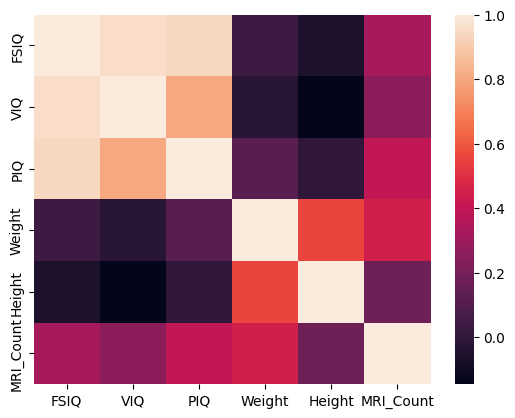

In [ ]:
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout = True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-62-77e80db358d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

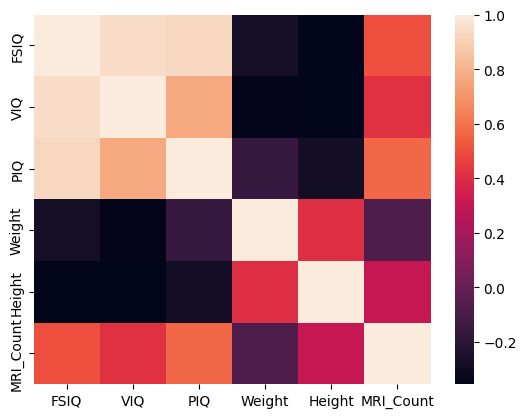

In [ ]:
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?

**Answer:**  Which means that there might be a weak connection or relationship between 2 variables that are being compared.

Why separate the genders?

**Answer:**  To see the difference between 2 attributes of different genders

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

**Answer:**  The PIQ, VIQ, and FSIQ are the variables that correlates with brain size, this is because based from the datas that are plotted the variables are very close and determined from brain size of a gender.

##**Supplementary**##

In [ ]:
#load the data
import pandas as pd
injuriesFile = '/content/serious-injury-outcome-indicators-2000-2022.csv'
injuriesFrame = pd.read_csv(injuriesFile)
injuriesFrame.head() #Verifying the data

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [ ]:
#Using describe to plot the common results of related injuries.
injuriesFrame.describe()

,Data_value,Lower_CI,Upper_CI
count,2948.000000,2948.000000,2948.000000
mean,506.084598,479.994650,532.174547
std,1463.086910,1430.814700,1495.744191
min,0.700127,0.191677,0.777077
25%,15.520960,13.439336,17.471161
50%,64.000000,51.845302,73.587972
75%,319.250000,284.230218,354.269782
max,15268.000000,15025.819500,15510.180500


In [ ]:
#Spliting the data into different severity of their injuries
FatalDf = injuriesFrame[(injuriesFrame.Severity == 'Fatal')]
SeriousNFDf = injuriesFrame[(injuriesFrame.Severity == 'Serious non-fatal')]
SeriousDf = injuriesFrame[(injuriesFrame.Severity == 'Serious')]


<ipython-input-79-8cb08f105cdc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fatalinj = FatalDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)


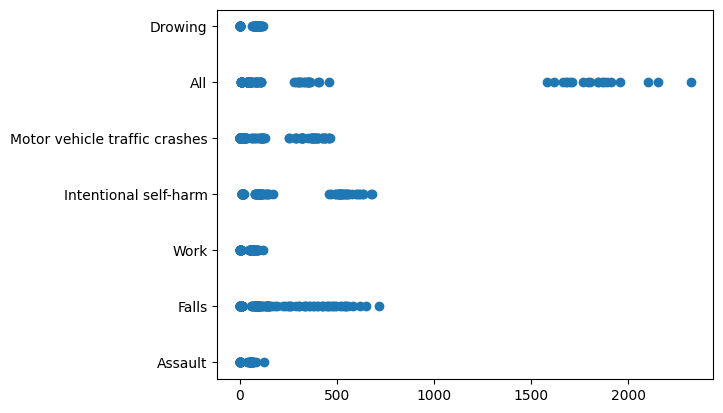

In [ ]:
#Plotting the graphs
fatalinj = FatalDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)
plt.scatter(fatalinj, FatalDf["Cause"])

<ipython-input-80-56f4ef82162e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  seriousNFinj = SeriousNFDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)


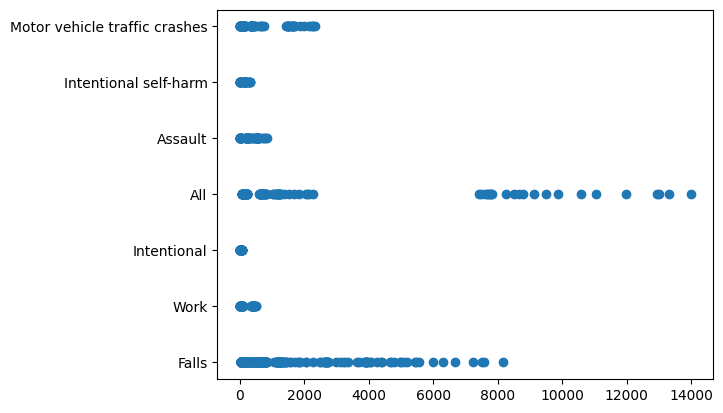

In [ ]:
seriousNFinj = SeriousNFDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)
plt.scatter(seriousNFinj, SeriousNFDf["Cause"])

<ipython-input-81-34617732347c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  seriousinj = SeriousDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)


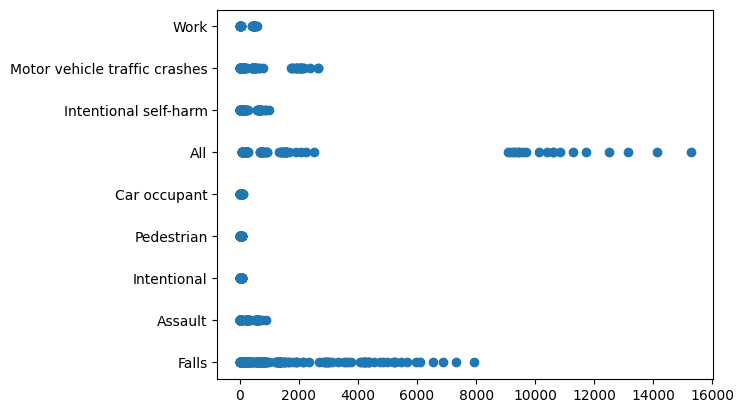

In [ ]:
seriousinj = SeriousDf[["Lower_CI", "Upper_CI", "Units"]].mean(axis=1)
plt.scatter(seriousinj, SeriousDf["Cause"])

In [ ]:
#Using the .corr command to determine the correlation
injuriesFrame.corr(method='pearson')

<ipython-input-82-ffdd29297149>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  injuriesFrame.corr(method='pearson')


,Data_value,Lower_CI,Upper_CI
Data_value,1.000000,0.999862,0.999874
Lower_CI,0.999862,1.000000,0.999473
Upper_CI,0.999874,0.999473,1.000000


In [ ]:
FatalDf.corr(method='pearson')

<ipython-input-83-a6124b444750>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  FatalDf.corr(method='pearson')


,Data_value,Lower_CI,Upper_CI
Data_value,1.000000,0.999652,0.999719
Lower_CI,0.999652,1.000000,0.998744
Upper_CI,0.999719,0.998744,1.000000


In [ ]:
SeriousNFDf.corr(method='pearson')

<ipython-input-84-9d5a4ee760d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SeriousNFDf.corr(method='pearson')


,Data_value,Lower_CI,Upper_CI
Data_value,1.000000,0.999874,0.999884
Lower_CI,0.999874,1.000000,0.999517
Upper_CI,0.999884,0.999517,1.000000


In [ ]:
SeriousDf.corr(method='pearson')

<ipython-input-85-a8255e9a7781>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SeriousDf.corr(method='pearson')


,Data_value,Lower_CI,Upper_CI
Data_value,1.000000,0.999869,0.999879
Lower_CI,0.999869,1.000000,0.999496
Upper_CI,0.999879,0.999496,1.000000


<ipython-input-86-94919b77314e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fcorr = FatalDf.corr()


<Axes: >

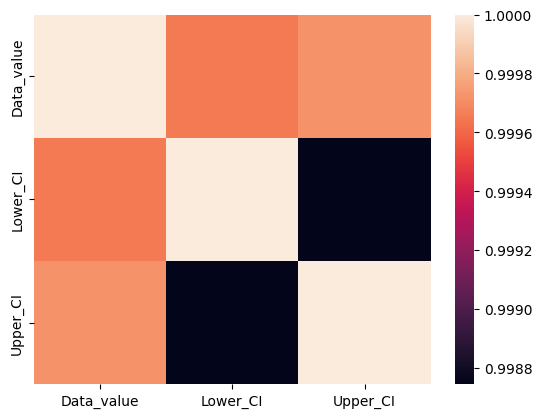

In [ ]:
#Plotting correlation using heatmap
fcorr = FatalDf.corr()
sns.heatmap(fcorr)


<ipython-input-87-c635ec0f7c8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  snfcorr = SeriousNFDf.corr()


<Axes: >

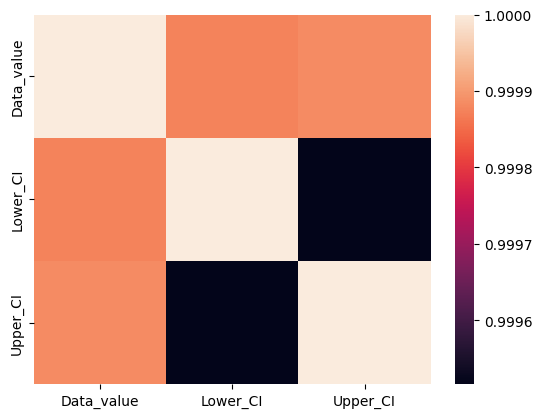

In [ ]:
snfcorr = SeriousNFDf.corr()
sns.heatmap(snfcorr)

<ipython-input-90-aca64f9840e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scorr = SeriousDf.corr()


<Axes: >

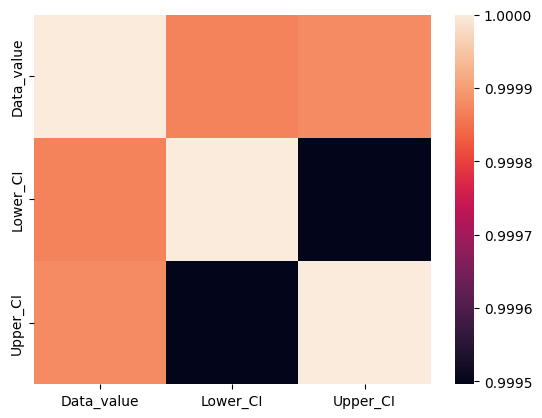

In [ ]:
scorr = SeriousDf.corr()
sns.heatmap(scorr)

##**Conclusions/observations/analysis**##

Based from doing this activity using correlation analysis with python it can plot the data according to the commands the user or what to do with the data, it can be manipulated to show the different areas of attributes within the dataframe brainsize of 2 different genders. My observation with this activity that using python for correlation analysis is a useful language to read and give the variables of data a meaning on how to analyzed the gathered data.